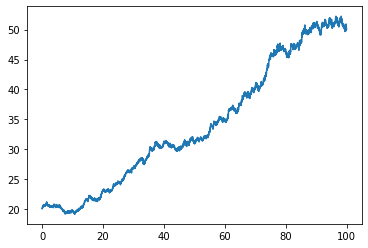

In [2]:
# https://www.quora.com/Is-trend-following-and-momentum-trading-the-same-thing 
# https://www.quantopian.com/posts/trend-follow-algo
# https://en.wikipedia.org/wiki/Average_true_range
# https://en.wikipedia.org/wiki/Bollinger_Bands
# https://en.wikipedia.org/wiki/Keltner_channel
# https://en.wikipedia.org/wiki/Donchian_channel

#SCENARIO 1

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

T = 100
mu = 0.01
sigma = 0.02
S0 = 20
dt = 0.01
N = round(T/dt)
t = np.linspace(0, T, N)
W = np.random.standard_normal(size = N) 
W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
X = (mu-0.5*sigma**2)*t + sigma*W 
S = S0*np.exp(X) ### geometric brownian motion ###
plt.plot(t, S)
plt.show()

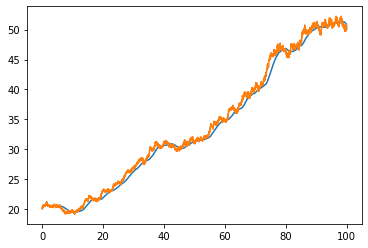

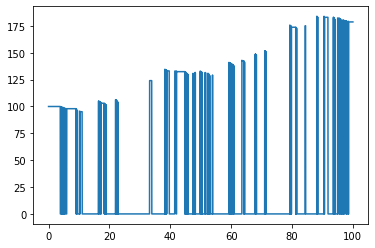

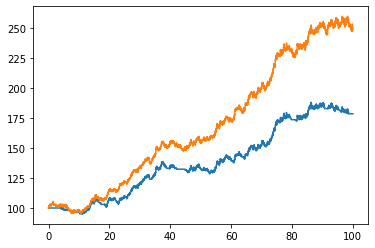

In [3]:
#TRADING: TREND FOLLOWING 
    
time_window = 3*int(1/dt)
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S)) #volume
cash = np.zeros(np.shape(S))

cash[0] = 100


for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] < x:         
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] > x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1] #We are just incrementing the moving average array size? 
        
plt.plot(t, ma)
plt.plot(t, S)

plt.show()

strategy = [a*b for a,b in zip(w,S)]+ cash

plt.plot(t, cash)
plt.show()

plt.plot(t, strategy)
plt.plot(t, cash[0]*S/S[0])
plt.show()



In [4]:
%precision %.2f
# What is the total return of my strategy? 
(strategy[-1]-strategy[0])/strategy[0]


0.7871461784108288

In [5]:
%precision %.2f
# What if I bought all the stocks I could on the first day and I kept them for the whole trading period?
(S[-1]-S[0])/S[0] 


1.4935492051972978

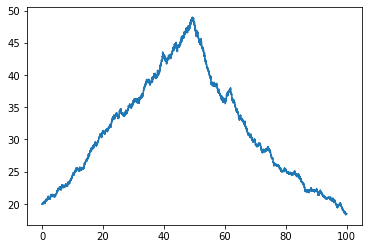

In [6]:
#SCENARIO 2 

Th = 50
mu = 0.02
sigma = 0.02
S0 = 20
dt = 0.01
N = round(Th/dt)
t = np.linspace(0, Th, N)
W = np.random.standard_normal(size = N) 
W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
X = (mu-0.5*sigma**2)*t + sigma*W 
S1 = S0*np.exp(X) ### geometric brownian motion ###

Th = 50
mu = -0.02
sigma = 0.02
S0 = 20
dt = 0.01
N = round(Th/dt)
t = np.linspace(0, Th, N)
W = np.random.standard_normal(size = N) 
W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
X = (mu-0.5*sigma**2)*t + sigma*W 
S2 = S1[-1]*np.exp(X) ### geometric brownian motion ###

T = 2*Th
N = round(T/dt)
t = np.linspace(0, T, N)
S = np.concatenate((S1,S2),axis=0)

plt.plot(t, S)
plt.show()

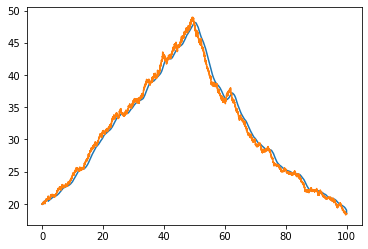

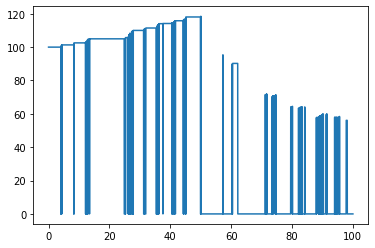

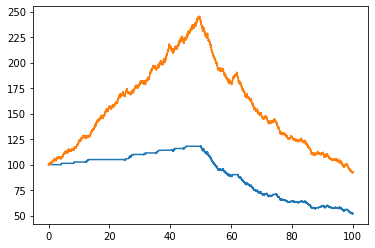

In [7]:
#TRADING: TREND FOLLOWING 
    
time_window = 2*int(1/dt)
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        #can do stuff with moving_ave here
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] > x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] < x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]
        
plt.plot(t, ma)
plt.plot(t, S)

plt.show()

strategy = [a*b for a,b in zip(w,S)]+ cash

plt.plot(t, cash)
plt.show()

plt.plot(t, strategy)
plt.plot(t, cash[0]*S/S[0])
plt.show()

In [8]:
%precision %.2f
# What is the total return of my strategy? 
(strategy[-1]-strategy[0])/strategy[0]


-0.4772691588521841

In [11]:
%precision %.2f
# What if I bought all the stocks I could on the first day and I kept them for the whole trading period?
(S[-1]-S[0])/S[0] 


-0.1289422120091784